In [3]:
import base64

In [5]:
with open('eng.txt', 'rb') as input_file, open('eng_base64.txt', 'wb') as output_file:
    encoded_string = base64.b64encode(input_file.read())
    output_file.write(encoded_string)

In [15]:
import collections
import math
import matplotlib.pyplot as plt

class FileEntropy:
    def __init__(self, file_name):
        self.file_name = file_name
        self.text = self._read_file()
        self.is_binary = 0
        self.histogram = None

    def _read_file(self):
        try:
            with open(self.file_name, 'r') as f:
                text = f.read()
                return text.replace(' ', '')
        except FileNotFoundError:
            return None

    def calculate_entropy(self):
        symbol_counts = collections.Counter(self.text)
        total_symbols = len(self.text)
        probabilities = {symbol: count / total_symbols for symbol, count in symbol_counts.items()}
        self.histogram = probabilities
        entropy = -sum(p * math.log2(p) for p in probabilities.values())
        return entropy

    def draw_histogram(self):
        if self.histogram:
            plt.bar(self.histogram.keys(), self.histogram.values())
            plt.xlabel("Символ")
            plt.ylabel("Вероятность")
            plt.title("Вероятности символов")
            plt.show()

    def effective_entropy(self, p):
        q = 1 - p
        if self.is_binary and (p == 0 or q == 0):
            return 1
        elif not self.is_binary:
            if p == 1:
                return 0
            else:
                return self.calculate_entropy() - (- p * math.log2(p) - q * math.log2(q))
        return 1 - (- p * math.log2(p) - q * math.log2(q))
    
    def calculate_Hartley_entropy(self):
        N = len(set(self.text))
        return math.log2(N) if N > 0 else 0

    def calculate_redundancy(self):
        N = len(set(self.text))
        H = self.calculate_entropy()
        return 1 - H / math.log2(N) if N > 0 else 0

Энтропия Шеннону 5.3498762950213035
Энтропия Хартли 5.882643049361842
-----------------------------------------------------------


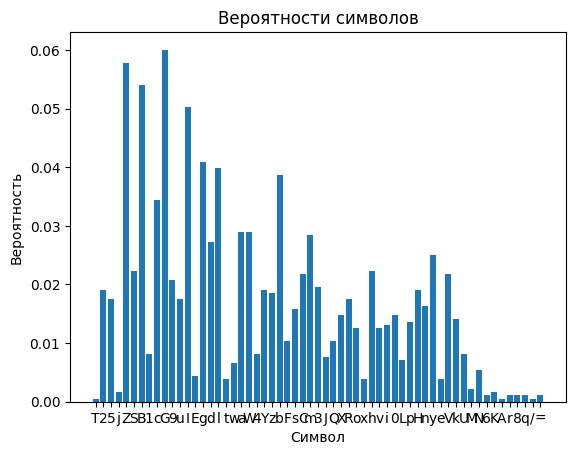

Энтропия Шеннону 4.421126789535634
Энтропия Хартли 5.321928094887363
-----------------------------------------------------------


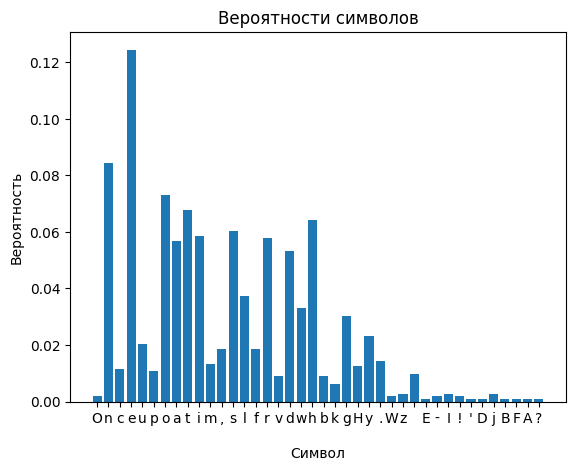

In [19]:

files = ['./eng_base64.txt', './eng.txt']


for file in files:
    entropy_file = FileEntropy(file)
    print(f"Энтропия Шеннону {entropy_file.calculate_entropy()}")
    print(f"Энтропия Хартли {entropy_file.calculate_Hartley_entropy()}")
    print("-----------------------------------------------------------")
    entropy_file.draw_histogram()
